#### Packages to use:

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

####    Exporting the image to python environment:

In [ ]:
img = cv2.imread('image.png')
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

####    Draw a histogram of the image

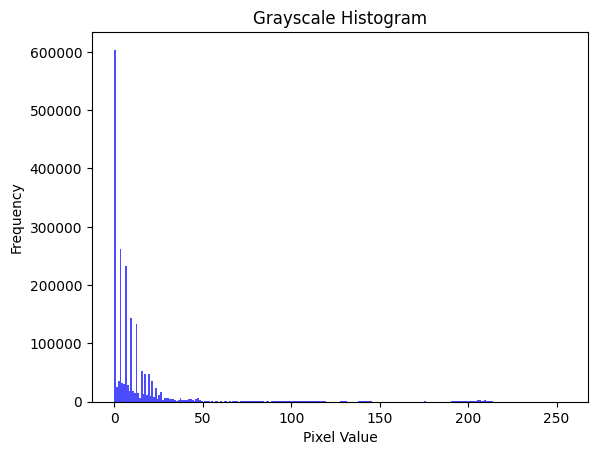

In [3]:
histogram = cv2.calcHist([grey_img], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.hist(np.arange(256), bins= 256, weights=histogram, color = 'blue', alpha = 0.7)
plt.show()

####    Histogram equalization

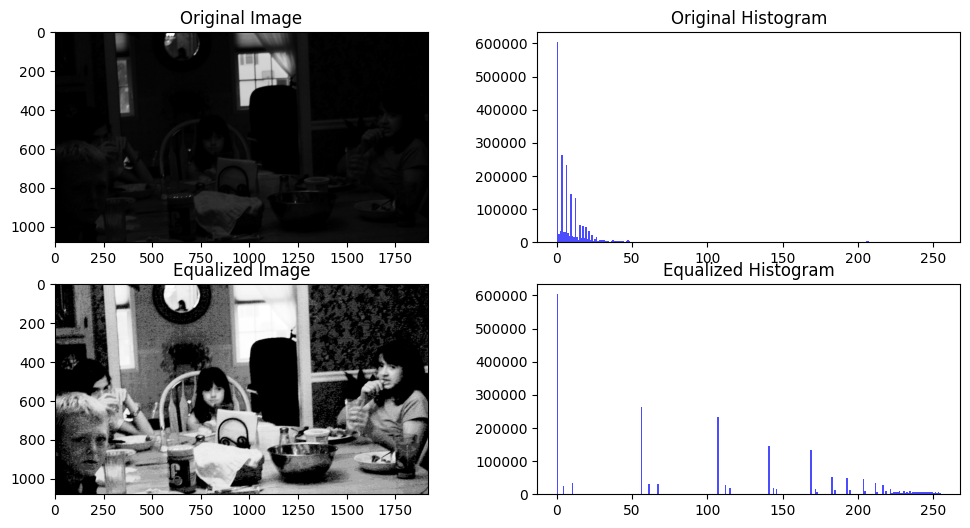

In [4]:
img_equalized = cv2.equalizeHist(grey_img)
histogram_org = cv2.calcHist([grey_img] , [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([img_equalized], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(221),plt.imshow(grey_img, cmap='gray'), plt.title('Original Image')
plt.subplot(222),plt.hist(np.arange(256), bins= 256, weights=histogram_org, color = 'blue', alpha = 0.7)
plt.title('Original Histogram')

plt.subplot(223),plt.imshow(img_equalized, cmap='gray'), plt.title('Equalized Image')
plt.subplot(224),plt.hist(np.arange(256), bins= 256, weights=hist_equalized, color = 'blue', alpha = 0.7)
plt.title('Equalized Histogram')

plt.show()

By adjusting the distribution of pixel values in the image using the “EqualizeHist” function expanding so that a better image is obtained. 0: represents black and 255 represents white is Comparing the two histograms. We can see that in our original image distributed. This results in a clearer image.

####    Double magnification processing with bicubic interpolation

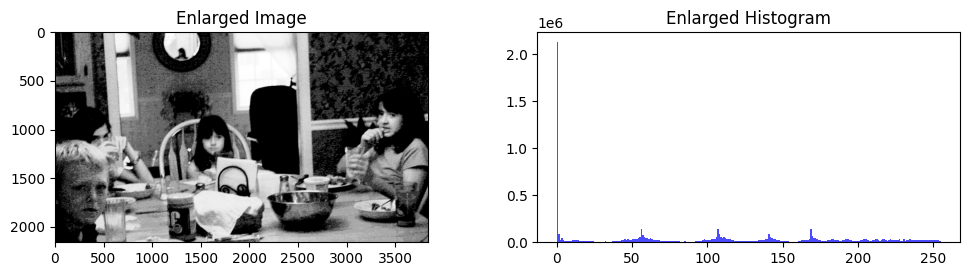

In [5]:
height, width = img_equalized.shape
img_enlarged = cv2.resize(img_equalized, (2*width, 2*height), interpolation = cv2.INTER_CUBIC)
hist_enlarged = cv2.calcHist([img_enlarged], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(221),plt.imshow(img_enlarged, cmap='gray'), plt.title('Enlarged Image')
plt.subplot(222),plt.hist(np.arange(256), bins= 256, weights=hist_enlarged, color = 'blue', alpha = 0.7)

plt.title('Enlarged Histogram')
plt.show()

With the help of the Resize function, we can use this value to resize the image to whatever size we want to create.
we do not multiply. The large drop in the black value in the histogram is due to the equalization process. is due to the synchronization process. The formation of tiny pyramids of 50, 100, 150 is probably the result may be due to an effort to emphasize certain tones

####    Görüntüye unsharp masking ve highboost filtering uygulama işlemi

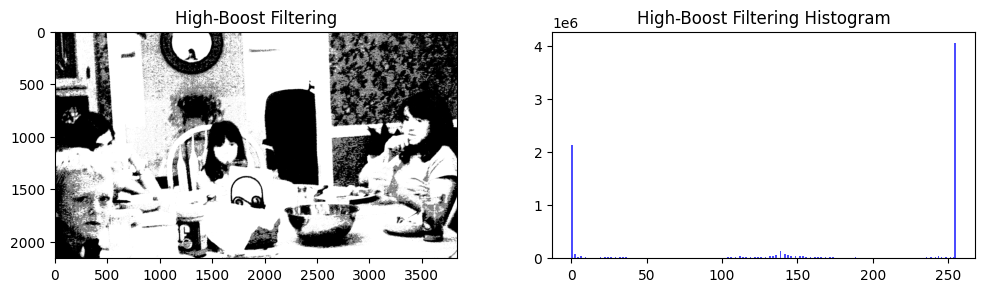

In [6]:
blurred = cv2.GaussianBlur(img_enlarged, (5, 5), 2)
unsarp_mask = cv2.addWeighted(img_enlarged, 1.5, blurred, 0, -1)
highboost_filter = cv2.addWeighted(img_enlarged, 2.5, unsarp_mask, 0, -1)


plt.figure(figsize=(12, 10))

plt.subplot(3,2,5),plt.imshow(highboost_filter, cmap='gray'), plt.title('High-Boost Filtering') 
plt.subplot(3,2,6),plt.hist(np.arange(256), bins= 256, weights=cv2.calcHist([highboost_filter], [0], None, [256], [0, 256]), color = 'blue', alpha = 0.7)


plt.title('High-Boost Filtering Histogram')
plt.show()

Gauss filtresi uygulanarak bulanıklaştırma işlemi yapılıyor. (5, 5) çekirdek boyutunu belirtir ve 2 standart sapmayı ifade eder görüntüyü yumuşatmak için kullandık. Histogram için belirli tonların veya detayların vurgulandığını söyleyebiliriz. Görselin Daha dengeli bir hale geldiğini söyleyebiliriz.

####    The process of shifting dft2

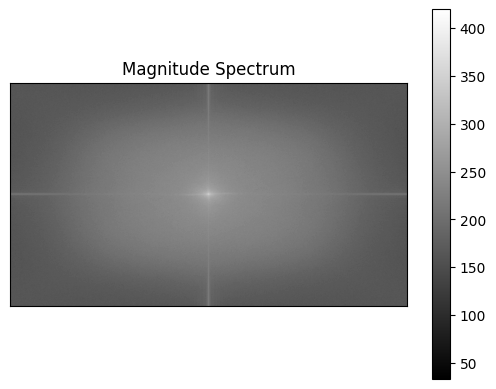

In [7]:
dft = cv2.dft(np.float32(highboost_filter), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1]))

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.show()

####    Plotting the Gaussian filter

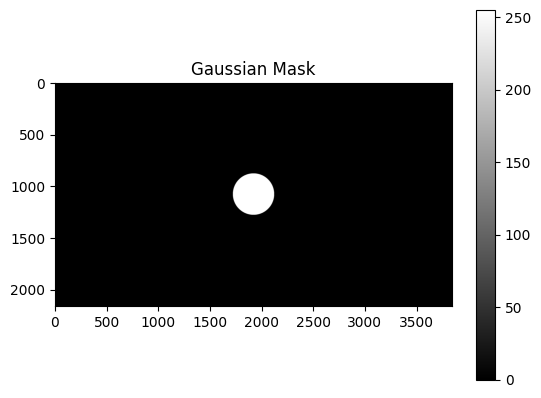

In [8]:
radius = 200
rows, cols = highboost_filter.shape
crow, ccol = rows//2, cols//2
x ,y = np.ogrid[:rows, :cols]
mask = (x- crow)**2 + (y-ccol)**2 <= radius**2

img_clear_circle = np.zeros_like(highboost_filter)
img_clear_circle[mask] = 255


black_background = np.zeros_like(highboost_filter)
black_background[crow- radius:crow+radius, ccol-radius:ccol+radius] = img_clear_circle[crow- radius:crow+radius, ccol-radius:ccol+radius]

plt.imshow(black_background, cmap='gray')
plt.title('Gaussian Mask')
plt.colorbar()
plt.show()

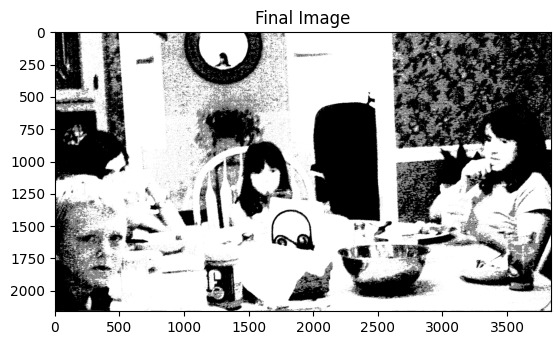

In [13]:
inverse_dft = cv2.idft(dft_shifted)
img_fin = cv2.magnitude(inverse_dft[:, :, 1], inverse_dft[:, :, 0])
img_fin = np.flipud(np.fliplr(img_fin))

plt.imshow(img_fin, cmap='gray')
plt.title("Final Image")
plt.show()

####    Combining all of our operations in a single plot

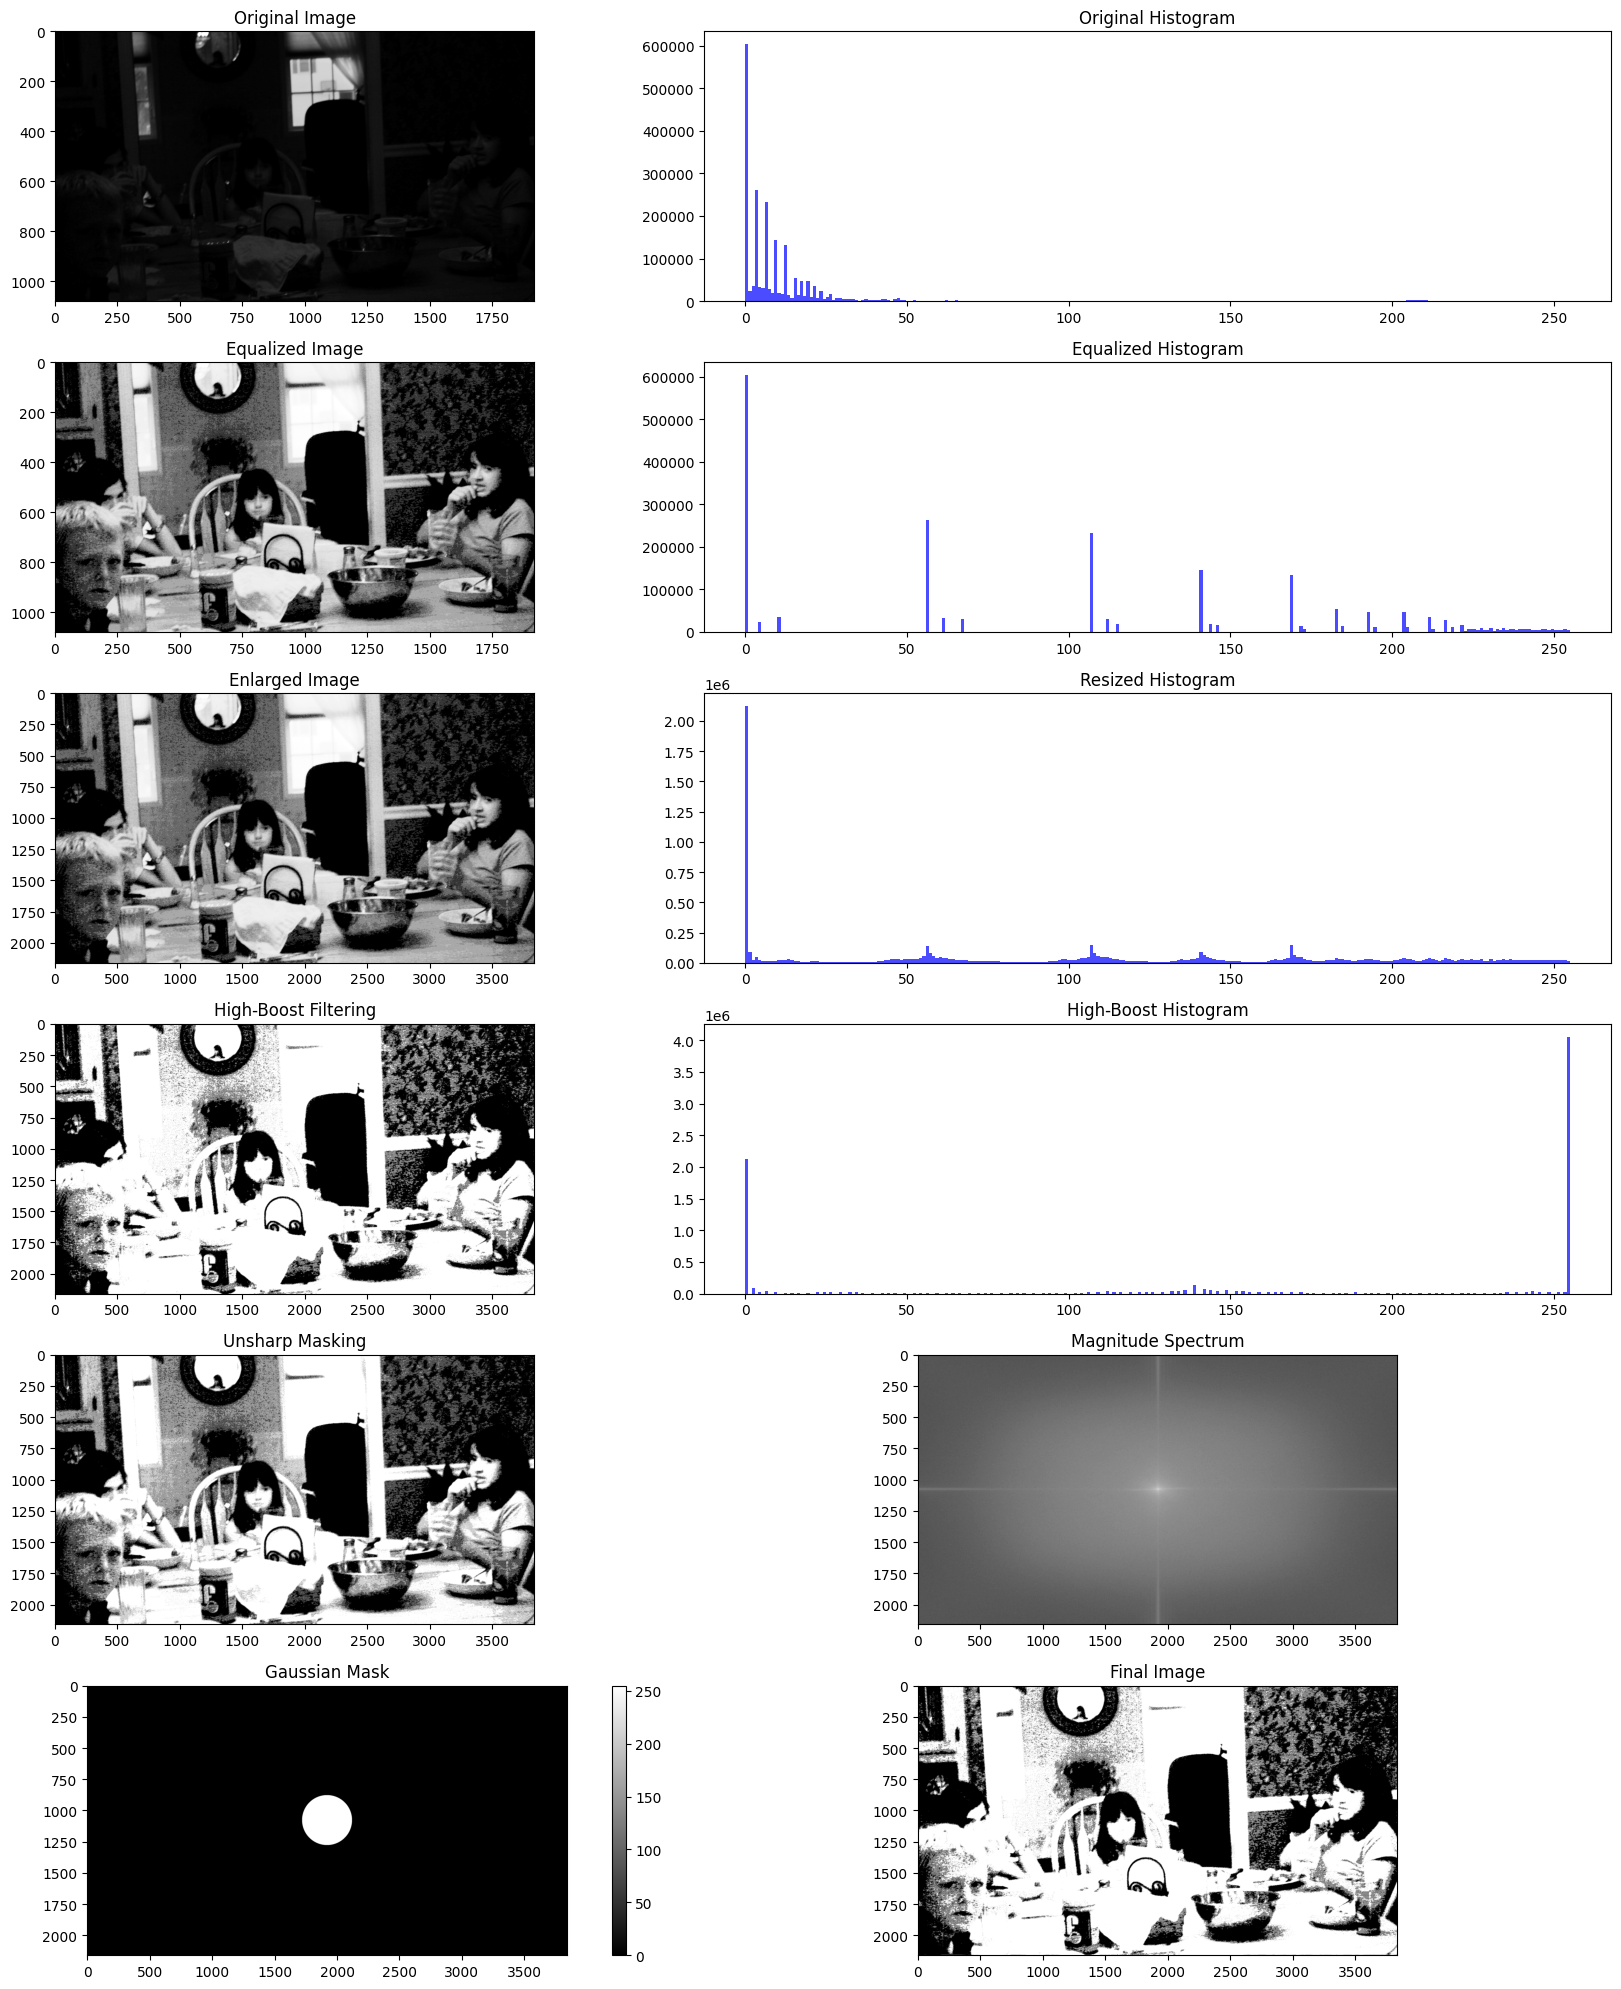

In [11]:
plt.figure(figsize=(18, 20))
plt.subplot(6, 2, 1)
plt.imshow(grey_img, cmap='gray')
plt.title('Original Image')
plt.subplot(6, 2, 2)
plt.hist(np.arange(256), bins=256, weights=histogram_org, color='blue', alpha=0.7)
plt.title('Original Histogram')
plt.subplot(6, 2, 3)
plt.imshow(img_equalized, cmap='gray')
plt.title('Equalized Image')
plt.subplot(6, 2, 4)
plt.hist(np.arange(256), bins=256, weights=hist_equalized, color='blue', alpha=0.7)
plt.title('Equalized Histogram')
plt.subplot(6, 2, 5)
plt.imshow(img_enlarged, cmap='gray')
plt.title('Enlarged Image')
plt.subplot(6, 2, 6)
plt.hist(np.arange(256), bins=256, weights=hist_enlarged, color='blue', alpha=0.7)
plt.title('Resized Histogram')
plt.subplot(6, 2, 8)
plt.hist(np.arange(256), bins=256, weights=cv2.calcHist([highboost_filter], [0], None, [256], [0, 256]), color='blue',
alpha=0.7)
plt.title('High-Boost Histogram')
plt.subplot(6, 2, 7)
plt.imshow(highboost_filter, cmap='gray')
plt.title('High-Boost Filtering')
plt.subplot(6, 2, 10)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.subplot(6, 2, 11)
plt.imshow(black_background, cmap='gray')
plt.title('Gaussian Mask')
plt.colorbar()
plt.subplot(6, 2, 12)
plt.imshow(img_fin, cmap='gray')
plt.title('Final Image')
plt.subplot(6, 2, 9)
plt.imshow(unsarp_mask, cmap='gray')
plt.title('Unsharp Masking')
plt.tight_layout()
plt.show()